<div style="border:solid gray 3px; padding: 40px">
    
**Описание проекта**


Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

```без подписки:```

абонентская плата отсутствует;

стоимость одной минуты поездки —  8 рублей;

стоимость старта (начала поездки) — 50 рублей;

```с подпиской Ultra:```

абонентская плата —  199 рублей в месяц;

стоимость одной минуты поездки — 6 рублей;

стоимость старта — бесплатно.

Загрузим библиотеки:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

#### Шаг 1. Загрузка данных

Загрузим данные из csv-файла ```users_go.csv```(Пользователи) в датафрейм c помощью библиотеки pandas.

Выведем первые 5 строк.
Изучим общую информацию о полученном датафрейме:

In [2]:
data1 = pd.read_csv('/datasets/users_go.csv')
display(data1.head(5))
data1.info()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


```Всего 1 565 строк, 5 колонок. Пропусков нет.```

Загрузим данные из csv-файла ```rides_go.csv```(Поездки) в датафрейм c помощью библиотеки pandas.

Выведем первые 5 строк.
Изучим общую информацию о полученном датафрейме:

In [3]:
data2 = pd.read_csv('/datasets/rides_go.csv')
display(data2.head(5))
data2.info()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


```Всего 18 068 строк, 4 колонки. Пропусков нет.```

Загрузим данные из csv-файла ```subscriptions_go.csv```(Подписки) в датафрейм c помощью библиотеки pandas.

Изучим общую информацию о полученном датафрейме:

In [4]:
data3 = pd.read_csv('/datasets/subscriptions_go.csv')
display(data3)
data3.info()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


```Всего 2 строки, 4 колонки. Пропусков нет.```

#### Шаг 2. Предобработка данных

Приведём столбец ```date``` из датасета с Поездками - data2 к типу даты pandas.
Проверим изменения:

In [5]:
data2['date'] = pd.to_datetime(data2['date'], format='%Y-%m-%d')
data2.dtypes

user_id              int64
distance           float64
duration           float64
date        datetime64[ns]
dtype: object

Создадим новый столбец ```month_date``` с номером месяца на основе столбца date.
Проверим добавление нового столбца ```month_date```:

In [6]:
data2['month_date'] = pd.DatetimeIndex(data2['date']).month
data2.head(5)

,user_id,distance,duration,date,month_date
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Проверим наличие дубликатов в датафреймах:

Проверим на наличие явных бубликатов ```датасет с Пользователями- data1.```

In [7]:
display(data1[data1['user_id'].duplicated()])
'Количество дубликатов:',data1['user_id'].duplicated().sum()

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


('Количество дубликатов:', 31)

Нашлось 31 явных дубликата. Удалим их.

In [8]:
data1=data1.drop_duplicates(subset=['user_id'], keep='first').reset_index(drop=True)
data1

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1529,1530,Ростислав,29,Сочи,free
1530,1531,Никита,25,Пятигорск,free
1531,1532,Алексей,26,Тюмень,free
1532,1533,Степан,22,Краснодар,free


проверим на наличие неявных дубликатов, для этого выведем уникальные значения по оставшимся столбцам data1:

In [9]:
print('Уникальные значения возраста:', data1['age'].unique())
print('Уникальные значения города:', data1['city'].unique())
print('Уникальные значения типа подписки:', data1['subscription_type'].unique())
print('Уникальные значения имени:', sorted(data1['name'].unique()))


Уникальные значения возраста: [22 31 20 26 28 25 23 21 18 27 24 29 32 14 19 30 17 12 35 33 13 15 37 16
 34 38 36 39 43]
Уникальные значения города: ['Тюмень' 'Омск' 'Москва' 'Ростов-на-Дону' 'Краснодар' 'Пятигорск'
 'Екатеринбург' 'Сочи']
Уникальные значения типа подписки: ['ultra' 'free']
Уникальные значения имени: ['Агата', 'Аделина', 'Адель', 'Айдар', 'Александр', 'Александра', 'Алексей', 'Алина', 'Алиса', 'Алия', 'Алла', 'Альберт', 'Альбина', 'Алёна', 'Амалия', 'Амина', 'Амир', 'Анастасия', 'Анатолий', 'Ангелина', 'Андрей', 'Анжелика', 'Анна', 'Антон', 'Антонина', 'Ариана', 'Арина', 'Арсен', 'Арсений', 'Артемий', 'Артур', 'Артём', 'Богдан', 'Борис', 'Вадим', 'Валентина', 'Валерий', 'Валерия', 'Варвара', 'Василий', 'Василина', 'Василиса', 'Вера', 'Вероника', 'Виктор', 'Виктория', 'Виолетта', 'Виталий', 'Виталина', 'Влад', 'Влада', 'Владимир', 'Владислав', 'Владислава', 'Всеволод', 'Вячеслав', 'Галина', 'Георгий', 'Герман', 'Глеб', 'Гордей', 'Григорий', 'Давид', 'Дамир', 'Даниил', 'Д

Неявных дубликатов в ```data1``` нет.

Проверим на наличие явных бубликатов датасет с ```Поездками- data2.```

In [10]:
display(data2[data2.duplicated()])
'Количество дубликатов:',data2.duplicated().sum()

,user_id,distance,duration,date,month_date


('Количество дубликатов:', 0)

Явных дубликатов в ```data2``` нет. Отдельно неявные дубликаты выявить невозможно.

В датафрейме с типами подписок ```data3``` всего 2 строки. Дубликатов нет.

#### Шаг 3. Исследовательский анализ данных

Опишим и визуализируем общую информацию о пользователях и поездках:

***3.1 частота встречаемости городов***

Посчитаем частоту встречаемости городов и визуализируем ее с помощью столбчатого графика.

In [11]:
print('Количество в абсолютных значениях:\n', data1['city'].value_counts())
print('В процентах:\n', data1.city.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
'Среднее значение:',data1['city'].value_counts().mean()

Количество в абсолютных значениях:
 Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64
В процентах:
 Пятигорск         14.3%
Екатеринбург      13.3%
Ростов-на-Дону    12.9%
Краснодар         12.6%
Сочи              12.3%
Омск              11.9%
Тюмень            11.7%
Москва            11.0%
Name: city, dtype: object


('Среднее значение:', 191.75)

Text(0.5, 1.0, 'Частота встречаемости городов')

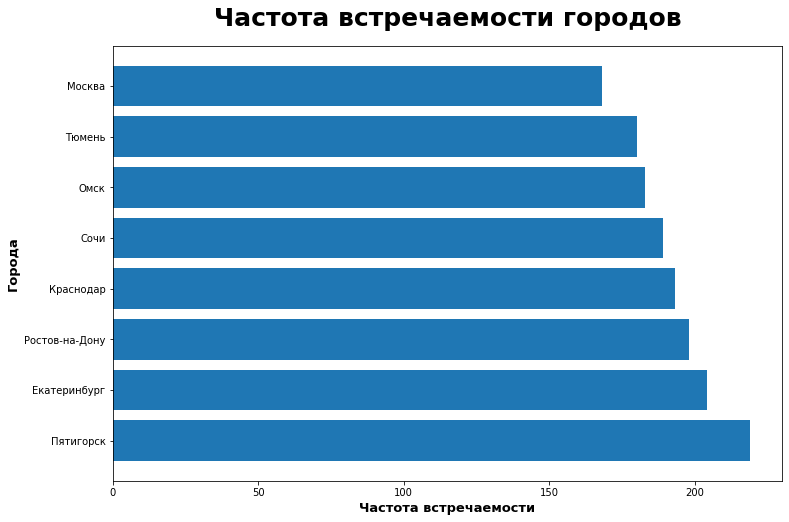

In [12]:
df = data1['city'].value_counts()
df2 = pd.DataFrame(df.items(), columns=['count', 'city'])

fig, ax = plt.subplots(figsize=(12,8))

bars = plt.barh(df2['count'], df2['city'])

plt.xlabel("Частота встречаемости", fontsize=13,
              fontweight='bold')
plt.ylabel("Города", fontsize=13,
              fontweight='bold')
ax.set_title("Частота встречаемости городов",fontsize=25,
              fontweight='bold', pad=20)

построим для наглядности круговую диаграмму

In [13]:
#data1['city'].value_counts().plot(kind ='pie', figsize=(10, 10))

**Вывод :** Арендой самокатов сервиса GoFas пользуются в 8 городах. ```Больше всего пользователей в  Пятигорске(219)```, Екатеринбурге(204)и Ростове-на-Дону (198); ```меньше всего в Москве(168)```, Тюмени(180) и Омске(183). ```В среднем около 192 пользователя на город.```

***3.2 соотношение пользователей с подпиской и без подписки***

Посчитаем соотношение пользователей с подпиской и без подписки и визуализируем ее с помощью круговой диаграммы.

In [14]:
print('Количество в абсолютных значениях:\n',  data1['subscription_type'].value_counts())
print('В процентах:\n', data1.subscription_type.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Количество в абсолютных значениях:
 free     835
ultra    699
Name: subscription_type, dtype: int64
В процентах:
 free     54.4%
ultra    45.6%
Name: subscription_type, dtype: object


In [15]:
#df = data1['subscription_type'].value_counts()
#df2 = pd.DataFrame(df.items(), columns=['count', 'subscription_type'])

#fig, ax = plt.subplots(figsize=(12,8))

#bars = plt.barh(df2['count'], df2['subscription_type'])

#plt.xlabel("Частота встречаемости", fontsize=13, fontweight='bold')
#plt.ylabel("Наличие/ отсутствие подписки", fontsize=13, fontweight='bold')
#ax.set_title("Соотношение пользователей с подпиской и без подписки",fontsize=25,fontweight='bold', pad=20)

<div class="alert alert-info">
столбчатый график законспектировал.
</div>

<AxesSubplot:ylabel='subscription_type'>

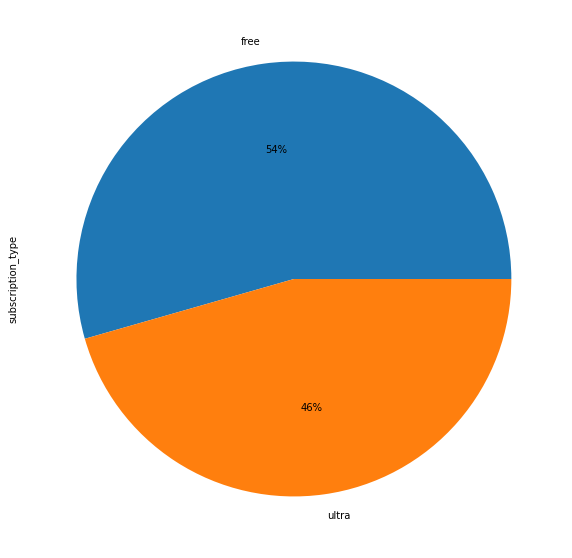

In [16]:
data1['subscription_type'].value_counts().plot(kind ='pie', figsize=(10, 10), autopct='%1.0f%%')

**Вывод:** ```В основном пользователи без подписок. Из 1534 пользователей 835 пользователей (54.4%) без подписок, 699 позователей (45.6%) с подпиской.```

***3.3 возраст пользователей***

Посчитаем частоту встречаемости возрастов пользователей и визуализируем ее с помощью гистограммы.

In [17]:
print('Количество в абсолютных значениях:\n', data1['age'].value_counts())
print('В процентах:\n', data1.age.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
'Средний возраст пользователя:',data1['age'].mean()

Количество в абсолютных значениях:
 25    145
24    132
26    131
23    129
27    119
22    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
34     19
16     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: age, dtype: int64
В процентах:
 25    9.5%
24    8.6%
26    8.5%
23    8.4%
27    7.8%
22    7.8%
28    7.3%
21    6.1%
20    4.6%
30    4.4%
29    4.4%
31    3.1%
19    3.1%
18    3.0%
32    2.7%
33    2.5%
17    1.7%
34    1.2%
16    1.2%
35    1.0%
15    0.8%
14    0.6%
13    0.5%
36    0.4%
12    0.3%
38    0.2%
37    0.1%
39    0.1%
43    0.1%
Name: age, dtype: object


('Средний возраст пользователя:', 24.903520208604956)

Text(0.5, 1.0, 'Частота встречаемости возрастов пользователей')

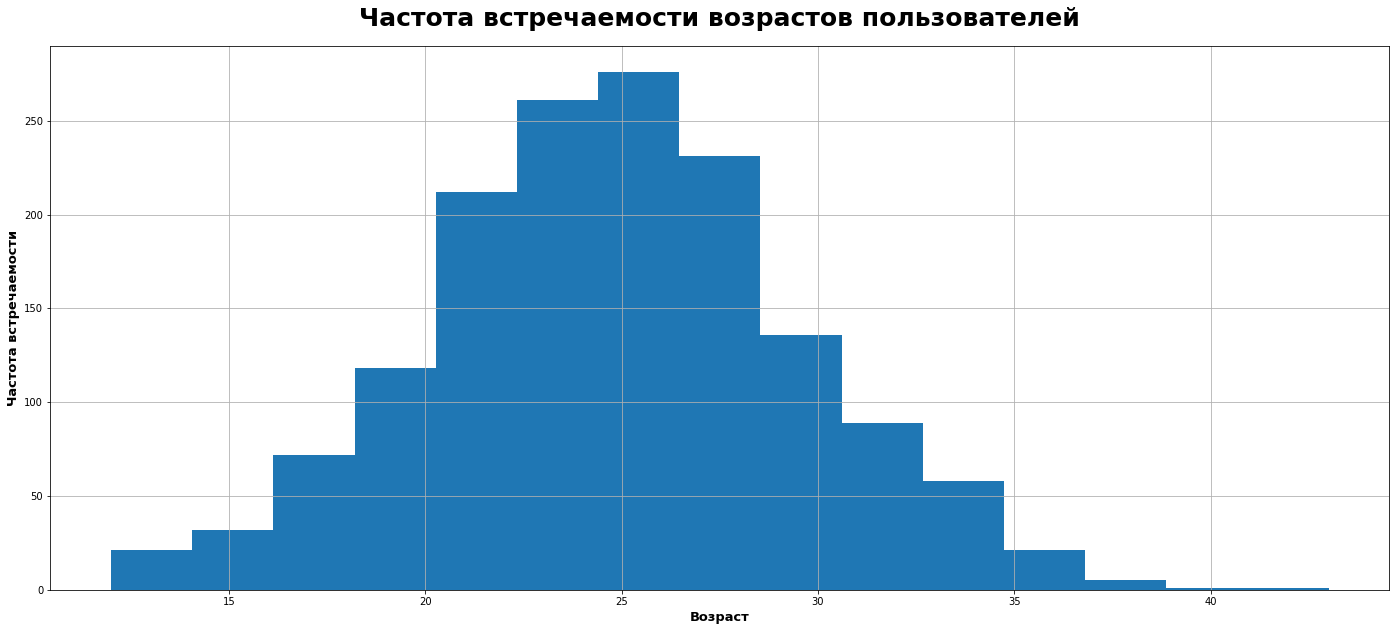

In [18]:
data1['age'].hist(bins = 15,grid=True, figsize=(24, 10))

plt.xlabel("Возраст", fontsize=13,
              fontweight='bold')
plt.ylabel("Частота встречаемости", fontsize=13,
              fontweight='bold')
plt.title('Частота встречаемости возрастов пользователей',fontsize=25,
              fontweight='bold', pad=20)

Нормальное распределение

построим для наглядности круговую диаграмму

<AxesSubplot:ylabel='age'>

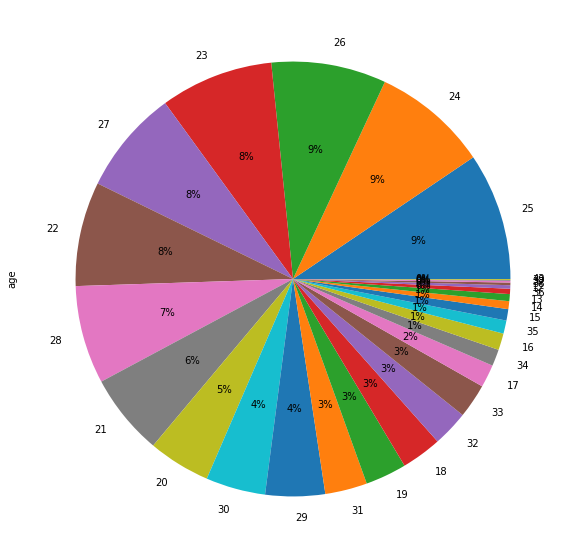

In [19]:
data1['age'].value_counts().plot(kind ='pie', figsize=(10, 10), autopct='%1.0f%%')

Посмотрим характкристики

In [20]:
data1['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

**Вывод:** ```В основном пользователи сервиса в возрасте от 22 до 28 лет.``` средний возраст около 25 лет. Наиболее редко  всречающиеся - менее 13 и более 37 лет.

***3.4 расстояние, которое пользователь преодолел за одну поездку***

Категоризируем показатели.

In [21]:
def new_distance(dist):
    try:
        if dist <= 1000:
            return '<=1000'
        elif 1000.01 <= dist <= 2000.00:
            return '1000.01-2000.00'
        elif 2000.01 <= dist <= 3000.00:
            return '2000.01-3000.00'
        elif 3000.01 <= dist <= 4000.00:
            return '3000.01-4000.00'
        elif 4000.01 <= dist <= 5000.00:
            return '4000.01-5000.00'
        elif 5000.01 <= dist <= 6000.00:
            return '5000.01-6000.00'
        elif dist >= 6000.01:
            return '>=6000.01'
    except:
        pass
new_distance_category = data2['distance'].apply(new_distance) 
new_distance_category.value_counts()

3000.01-4000.00    6698
2000.01-3000.00    5540
4000.01-5000.00    2937
<=1000             1372
1000.01-2000.00     980
5000.01-6000.00     495
>=6000.01            46
Name: distance, dtype: int64

визуализируем ее с помощью гистограммы.

Text(0.5, 1.0, 'Частота встречаемости расстояния поездки')

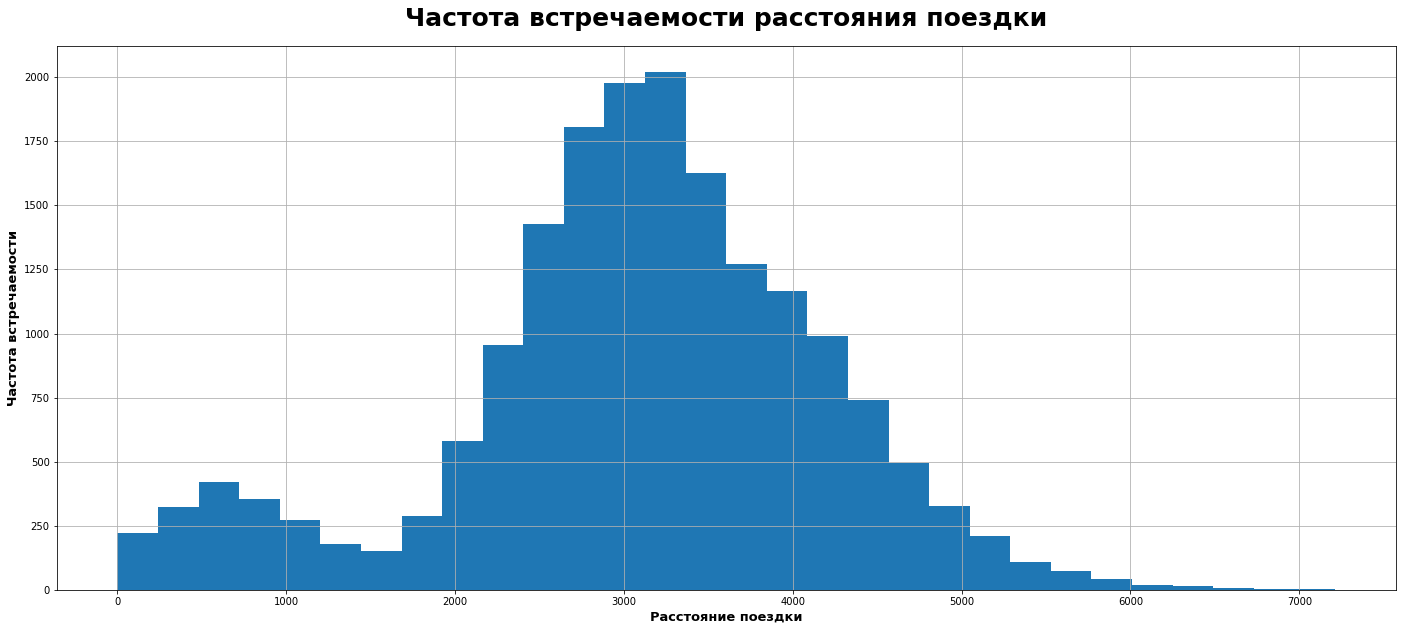

In [22]:
data2['distance'].hist(bins = 30,grid=True, figsize=(24, 10))

plt.xlabel("Расстояние поездки", fontsize=13,
              fontweight='bold')
plt.ylabel("Частота встречаемости", fontsize=13,
              fontweight='bold')
plt.title('Частота встречаемости расстояния поездки',fontsize=25,
              fontweight='bold', pad=20)

2 пика. Первый - ок. 500 м. на короткие поездки, второй - ок. 3000 м. на длинные.

посмотрим характеристики:

In [23]:
data2['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

**Вывод:**  ```В среднем поездка занимает от 2 543.2 м. до 3 776.2 м.``` Медиана - 3 133.6 м. Гистограмма имеет 2 пика. Первый - около 500 м. на короткие поездки, второй - ок. 3000 м. на длинные.

**3.5 продолжительность поездок.**

Категоризируем показатели.

In [24]:
def new_duration(duration):
    try:
        if duration <= 5.00:
            return '<=5.00'
        elif 5.01 <= duration <= 10.00:
            return '5.01-10.00'
        elif 10.01 <= duration <= 15.00:
            return '10.01-15.00'
        elif 15.01 <= duration <= 20.00:
            return '15.01-20.00'
        elif 20.01 <= duration <= 25.00:
            return '20.01-25.00'
        elif 25.01 <= duration <= 30.00:
            return '25.01-30.00'
        elif 30.01 <= duration <= 35.00:
            return '30.01-35.00'       
        elif duration >= 35.01:
            return '>=35.01'
    except:
        pass
new_duration_category = data2['duration'].apply(new_duration) 
new_duration_category.value_counts()

15.01-20.00    5713
10.01-15.00    4368
20.01-25.00    4130
25.01-30.00    1647
5.01-10.00     1360
30.01-35.00     508
<=5.00          278
>=35.01          28
Name: duration, dtype: int64

Text(0.5, 1.0, 'Частота встречаемости продолжительности поездки')

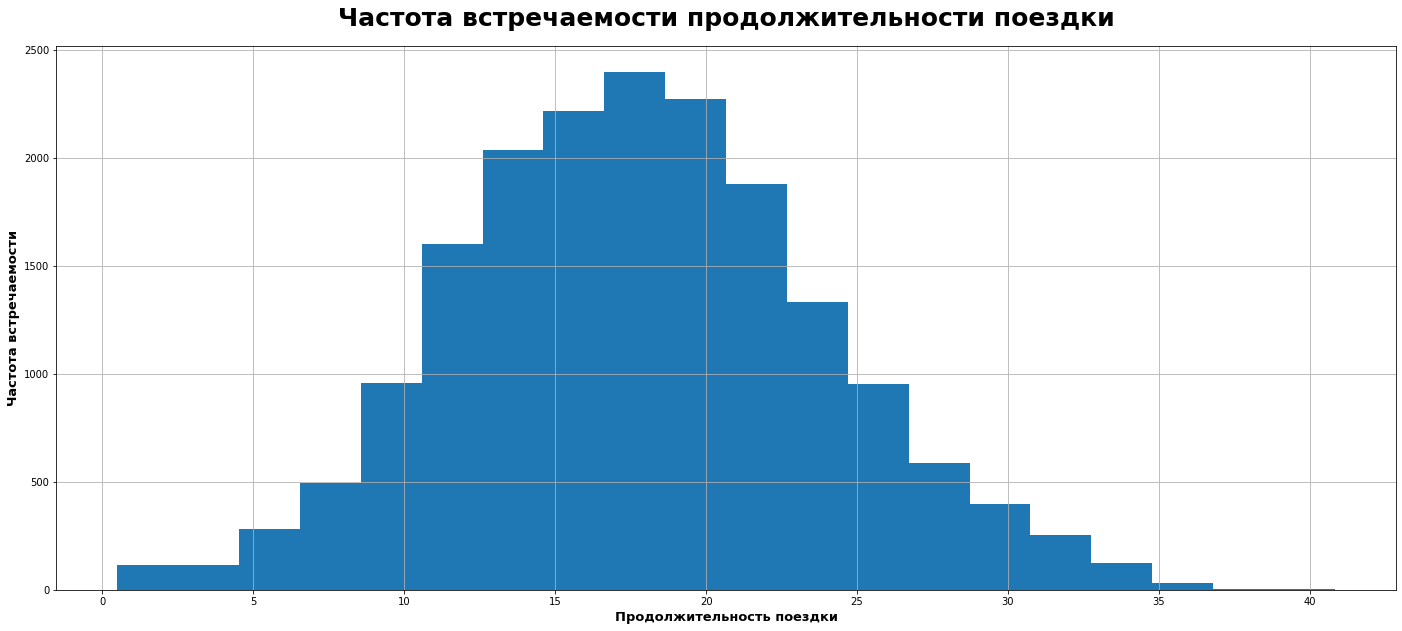

In [25]:
data2['duration'].hist(bins = 20,grid=True, figsize=(24, 10))

plt.xlabel("Продолжительность поездки", fontsize=13,
              fontweight='bold')
plt.ylabel("Частота встречаемости", fontsize=13,
              fontweight='bold')
plt.title('Частота встречаемости продолжительности поездки',fontsize=25,
              fontweight='bold', pad=20)

Гистограмма показывает нормальное распределение.

посморим характеристики:

In [26]:
data2['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

**Вывод:** ```В среднем поздка занимает от 13.6 мин. до 21.7 мин.``` Медиана - ок. 17.7 минут. Распределение нормальное.

**Вывод по разделу:**

Арендой самокатов сервиса GoFas пользуются в 8 городах. ```Больше всего пользователей в  Пятигорске(219)```, Екатеринбурге(204)и Ростове-на-Дону (198); меньше всего в Москве(168), Тюмени(180) и Омске(183). В среднем около 192 пользователя на город.

```В основном пользователи без подписок.``` Из 1534 пользователей 835 пользователей (54.4%) без подписок, 699 позователей (45.6%) с подпиской.

```В основном пользователи сервиса в возрасте от 22 до 28 лет.``` средний возраст около 25 лет. Наиболее редко всречающиеся - менее 13 и более 37 лет.

```В среднем поездка занимает от 2 543.2 м. до 3 776.2 м.``` Медиана - 3 133.6 м. Гистограмма имеет 2 пика. Первый - около 500 м. на короткие поездки, второй - ок. 3000 м. на длинные.

```В среднем поздка занимает от 13.6 мин. до 21.7 мин.``` Медиана - ок. 17.7 минут. Распределение нормальное.




#### Шаг 4. Объединение данных

***4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм***

Объединим данные из data1(Пользователи) и data3(Подписки), объединив по столбцу subscription_type и забрав все строки из data1(Пользователи) и совпадения из data3(Подписки). Создадим data_1_3. Проверим объединение.

In [27]:
data_1_3 = data1.merge(data3,on='subscription_type', how='left')
data_1_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
 5   minute_price       1534 non-null   int64 
 6   start_ride_price   1534 non-null   int64 
 7   subscription_fee   1534 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 107.9+ KB


Объединим данные из data_1_3 и data2(Поездки), объединив по столбцу user_id и забрав все строки из data_1_3  и совпадения из data2(Поездки) . Создадим data_new . Проверим объединение.

In [28]:
data_new = data_1_3.merge(data2, on='user_id',how='left')
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   minute_price       18068 non-null  int64         
 6   start_ride_price   18068 non-null  int64         
 7   subscription_fee   18068 non-null  int64         
 8   distance           18068 non-null  float64       
 9   duration           18068 non-null  float64       
 10  date               18068 non-null  datetime64[ns]
 11  month_date         18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


***4.2 Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:***

***С данными о пользователях без подписки:***

In [29]:
data_free = data_new[data_new['subscription_type']=='free']
data_free.head(10)

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month_date
6500,700,Айдар,22,Омск,free,8,50,0,2515.690719,14.944286,2021-01-02,1
6501,700,Айдар,22,Омск,free,8,50,0,846.932642,16.234663,2021-02-01,2
6502,700,Айдар,22,Омск,free,8,50,0,4004.434142,20.016628,2021-02-04,2
6503,700,Айдар,22,Омск,free,8,50,0,1205.911290,9.782872,2021-02-10,2
6504,700,Айдар,22,Омск,free,8,50,0,3047.379435,17.427673,2021-02-14,2
6505,700,Айдар,22,Омск,free,8,50,0,4342.002254,22.368009,2021-02-23,2
6506,700,Айдар,22,Омск,free,8,50,0,3798.334905,18.243756,2021-03-03,3
6507,700,Айдар,22,Омск,free,8,50,0,2984.551206,15.424899,2021-04-09,4
6508,700,Айдар,22,Омск,free,8,50,0,3360.107141,16.765497,2021-06-12,6
6509,700,Айдар,22,Омск,free,8,50,0,2567.543847,11.312160,2021-06-23,6


***С данными о пользователях с подпиской:***

In [30]:
data_ultra = data_new[data_new['subscription_type']=='ultra']
data_ultra.head(10)

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month_date
0,1,Кира,22,Тюмень,ultra,6,0,199,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,6,0,199,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,6,0,199,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,6,0,199,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,6,0,199,4028.687306,26.265803,2021-08-28,8
5,1,Кира,22,Тюмень,ultra,6,0,199,2770.890808,16.650138,2021-10-09,10
6,1,Кира,22,Тюмень,ultra,6,0,199,3039.020292,14.927879,2021-10-19,10
7,1,Кира,22,Тюмень,ultra,6,0,199,2842.118050,23.117468,2021-11-06,11
8,1,Кира,22,Тюмень,ultra,6,0,199,3412.690668,15.238072,2021-11-14,11
9,1,Кира,22,Тюмень,ultra,6,0,199,748.690645,15.041884,2021-11-22,11


Для удобства ещё раз посмотрим какое соотношение поездок с подпиской и без подписки.

In [31]:
print('Количество в абсолютных значениях:\n',  data_new['subscription_type'].value_counts())
print('В процентах:\n', data_new.subscription_type.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Количество в абсолютных значениях:
 free     11568
ultra     6500
Name: subscription_type, dtype: int64
В процентах:
 free     64.0%
ultra    36.0%
Name: subscription_type, dtype: object


посмотрим сколько поздок в среднем делает пользователель:

с подпиской 

In [32]:
data_free.groupby('user_id')['duration'].count().mean()

13.853892215568862

без подписки

In [33]:
data_ultra.groupby('user_id')['duration'].count().mean()

9.298998569384835

**Вывод** в среднем пользователь с подпиской совершил  9.30 поездок, а пользователь без подписки 13.85 поездок. Т.е. почти в 1,5 раза чаще. Из-за чего соотношение  между поездками без подписки(6 500) с подпиской (11 568)  составляет 64 %/ 36%. Общее количество поездок в data_new -  18 068.

***4.3 Визуализируем информацию о расстоянии и времени поездок***

***двойной график для расстояния поездок:*** 

<AxesSubplot:ylabel='Frequency'>

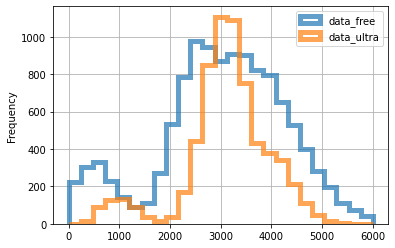

In [34]:
ax = data_free.plot(
    kind='hist',
    y='distance',
    histtype='step',
    range=(0, 6000),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='data_free',
)
data_ultra.plot(
    kind='hist',
    y='distance',
    histtype='step',
    range=(0, 6000),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='data_ultra',
    ax=ax,
    grid=True,
    legend=True,
) 

Характеристики 

In [35]:
display( 'Для пользователей без подписки',data_free['distance'].describe())
'Для пользователей с подпиской',data_ultra['distance'].describe()

'Для пользователей без подписки'

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

('Для пользователей с подпиской',
 count    6500.000000
 mean     3115.445388
 std       836.895330
 min       244.210438
 25%      2785.444017
 50%      3148.637229
 75%      3560.574425
 max      5699.769662
 Name: distance, dtype: float64)

**Вывод:** 

```обычное расстояние поездки у пользователей без подписки от 2 366 до 3 905 м.``` Медиана 3 114. График имеет 2 пика - ок 500 м и ок 2 500 м.

```обычное расстояние поездки  у пользователей с подпиской  от 2 785 до 3 560 м.``` Медиана 3 148. График имеет 2 пика - ок 1000 м и ок 3 000 м.  

По графикам  можно сделать вывод, что обычное расстояние поездок с подписками более сконцентровано в промежутке от примерно 2 500 м до 3 500 м, в то время , как обычное расстояние поездок без подписок больше распределено в промежутке примерно от 2 000 до 4000 м. 


***двойной график для времени поездок:*** 

<AxesSubplot:ylabel='Frequency'>

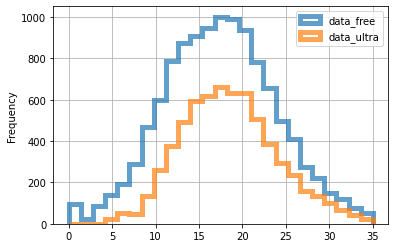

In [36]:
ax = data_free.plot(
    kind='hist',
    y='duration',
    histtype='step',
    range=(0, 35),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='data_free',
)
data_ultra.plot(
    kind='hist',
    y='duration',
    histtype='step',
    range=(0, 35),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='data_ultra',
    ax=ax,
    grid=True,
    legend=True,
) 

Характеристики

In [37]:
display( 'Для пользователей без подписки',data_free['duration'].describe())
'Для пользователей с подпиской',data_ultra['duration'].describe()

'Для пользователей без подписки'

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

('Для пользователей с подпиской',
 count    6500.000000
 mean       18.541985
 std         5.572048
 min         3.760353
 25%        14.524654
 50%        18.178153
 75%        21.884129
 max        40.823963
 Name: duration, dtype: float64)

**Вывод:** 

```обычное время поездки у пользователей без подписки от 13 до 21.6 мин.``` Медиана 17.3 мин.

```обычное время поездки у пользователей с подпиской от 14.5 до 22 м.``` Медиана 18.2 мин.

Оба графика имеют примерно одинаковое нормальное распределение. Время поездок с подпиской чуть дольше чем время поездок без подписок.



#### Шаг 5. Подсчёт выручки

***5.1 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдём суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.***

In [38]:
data_aggr = data_new.groupby(['user_id', 'month_date']).agg({'distance':'sum',})
data_aggr['duration_sum'] = data_new.groupby(['user_id', 'month_date']).agg({'duration':'sum',})
data_aggr['duration_count'] = data_new.groupby(['user_id', 'month_date']).agg({'duration':'count',})
data_aggr

distance  duration_sum  duration_count
user_id month_date                                            
1       1            7027.511294     41.416640               2
        4             754.159807      6.232113               1
        8            6723.470560     44.776802               2
        10           5809.911100     31.578017               2
        11           7003.499363     53.397424               3
...                          ...           ...             ...
1534    6            3409.468534     24.812678               2
        8            7622.453034     47.205960               2
        9            4928.173852     22.560373               1
        11          13350.015305     76.342174               4
        12           2371.711192     15.893917               1

[11331 rows x 3 columns]

***5.2 В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь.***

In [39]:
import numpy as np

# каждое значение из столбца duration округляется с помощью «потолка»: 
data_new['duration'] = np.ceil(data_new['duration']).astype(int)

рассчитываем стоимость одной поездки(без учета стоимости подписки):

In [40]:
data_new['price_rides'] = data_new['start_ride_price']+data_new['minute_price']*data_new['duration']
data_new

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month_date,price_rides
0,1,Кира,22,Тюмень,ultra,6,0,199,4409.919140,26,2021-01-01,1,156
1,1,Кира,22,Тюмень,ultra,6,0,199,2617.592153,16,2021-01-18,1,96
2,1,Кира,22,Тюмень,ultra,6,0,199,754.159807,7,2021-04-20,4,42
3,1,Кира,22,Тюмень,ultra,6,0,199,2694.783254,19,2021-08-11,8,114
4,1,Кира,22,Тюмень,ultra,6,0,199,4028.687306,27,2021-08-28,8,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,8,50,0,3781.098080,20,2021-11-04,11,210
18064,1534,Альберт,25,Краснодар,free,8,50,0,2840.423057,22,2021-11-16,11,226
18065,1534,Альберт,25,Краснодар,free,8,50,0,3826.185507,19,2021-11-18,11,202
18066,1534,Альберт,25,Краснодар,free,8,50,0,2902.308661,17,2021-11-27,11,186


Рассчитываем отдельно стоимость всех поездок отдельного пользователя и стоимость продписки в месяц

In [41]:
data_aggr['monthly revenue'] = data_new.groupby(['user_id', 'month_date']).agg({'price_rides':'sum',}).astype(int)
data_aggr['fee'] = data_new.groupby(['user_id', 'month_date']).agg({'subscription_fee':'max'})
data_aggr

distance  duration_sum  duration_count  \
user_id month_date                                               
1       1            7027.511294     41.416640               2   
        4             754.159807      6.232113               1   
        8            6723.470560     44.776802               2   
        10           5809.911100     31.578017               2   
        11           7003.499363     53.397424               3   
...                          ...           ...             ...   
1534    6            3409.468534     24.812678               2   
        8            7622.453034     47.205960               2   
        9            4928.173852     22.560373               1   
        11          13350.015305     76.342174               4   
        12           2371.711192     15.893917               1   

                    monthly revenue  fee  
user_id month_date                        
1       1                       252  199  
        4                        42  199  
        8                       276  199  
        10                      192  199  
        11                      336  199  
...                             ...  ...  
1534    6                       308    0  
        8                       484    0  
        9                       234    0  
        11                      824    0  
        12                      178    0  

[11331 rows x 5 columns]

Складываем стоимость всех поездок отдельного пользователя и стоимость продписки в месяц. Удаляем столбец со стоимостью подписки в мес. 

In [42]:
data_aggr['monthly revenue'] = data_aggr['monthly revenue']+data_aggr['fee']
#data_aggr.drop('fee', axis= 1 , inplace= True ) 
data_aggr.head(20)

distance  duration_sum  duration_count  \
user_id month_date                                               
1       1            7027.511294     41.416640               2   
        4             754.159807      6.232113               1   
        8            6723.470560     44.776802               2   
        10           5809.911100     31.578017               2   
        11           7003.499363     53.397424               3   
        12           6751.629942     27.203912               2   
2       3           10187.723006     60.959959               3   
        4            6164.381824     39.048633               2   
        6            3255.338202     13.851127               1   
        7            6780.722964     46.170157               2   
        8             923.007439      6.914760               1   
        10           2824.636598     18.779128               1   
        12           3828.248580     11.920514               1   
3       1            3061.777147     12.654443               1   
        2            5421.152016     37.568637               2   
        4            2956.651632     20.671364               1   
        5            9064.026918     61.404503               3   
        7           10919.595403     65.519784               3   
        9            2891.012822     22.390055               1   
        12           2593.381928     12.984728               1   

                    monthly revenue  fee  
user_id month_date                        
1       1                       451  199  
        4                       241  199  
        8                       475  199  
        10                      391  199  
        11                      535  199  
        12                      367  199  
2       3                       577  199  
        4                       439  199  
        6                       283  199  
        7                       487  199  
        8                       241  199  
        10                      313  199  
        12                      271  199  
3       1                       277  199  
        2                       433  199  
        4                       325  199  
        5                       577  199  
        7                       601  199  
        9                       337  199  
        12                      277  199

#### Шаг 6. Проверка гипотез

***6.1 Поймем, тратят ли пользователи с подпиской больше времени на поездки?***

Сформируем нулевую и альтернативную гипотезы  :

```H0 - "Среднее значение времеми поезки пользователей с подпиской равно  среднему значению времени поездки пользователей без подписки".```

```H1 - "Среднее значение времеми  поезки пользователей с подпиской больше среднего значения времени поездки пользователей без подписки". ```

Для проверки гипотез используем специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind(array1, array2, equal_var, alternative) Альернативная гипотеза - правосторонняя.

Уровень статистической значимости установим в 5%


In [43]:

ultra = data_ultra['duration'] 
free = data_free['duration']

alpha = 0.05

results = st.ttest_ind(ultra, free, alternative = 'greater')

print('p-значение:', results.pvalue)
if results.pvalue < alpha:    
    print('Отвергаем нулевую гипотезу')
else: 
   print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


**Вывод:** Нулевая гипотеза отвергнута. 

Действительно, среднее значение времеми  поезки пользователей с подпиской больше среднего значения времени поездки пользователей без подписки

**6.2 Расстояние одной поездки в 3130.** 

**3130 метров — оптимальное с точки зрения износа самоката.**

**Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает  3130 метров?**

Сформируем нулевую и альтернативную гипотезы :

```H0 - "Среднее значение расстояния поезки пользователей с подпиской за одну поездку не превышает оптимальное расстояние(с точки зрения износа) 3 130 м".```

```H1 - "Среднее значение расстояния поезки пользователей с подпиской за одну поездку превышает оптимальное расстояние(с точки зрения износа) 3 130 м".```

Для проверки гипотез используем специальный метод для проверки гипотезы о равенстве среднего генеральной совокупности числу	scipy.stats.ttest_1samp . Альернативная гипотеза - правосторонняя.

Уровень статистической значимости установим в 5%

In [44]:
ultra = data_ultra['distance'] 
popmean = 3130

alpha = 0.05

results = st.ttest_1samp(ultra, popmean, alternative = 'greater')

print('p-значение:', results.pvalue)
if results.pvalue < alpha:    
    print('Отвергаем нулевую гипотезу')
else: 
   print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


**Вывод** Не получилось отвергнуть нулевую гипотезу

Действительно, среднее значение расстояния поезки пользователей с подпиской за одну поездку не превышает оптимальное расстояние(с точки зрения износа) 3 130 м. 

Среднее значение расстояния поезки пользователей с подпиской за одну поездку составляет 3 115 м.

**6.3 Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.**

Сформируем нулевую и альтернативную гипотезы :

```H0 - "Средняя выручка от пользователей с подпиской равна средней выручке от пользователей без подписки".``` 

```H1 - "Средняя выручка от пользователей с подпиской выше средней выручке от пользователей без подписки".```

Для проверки гипотез используем специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind(array1, array2, equal_var, alternative) Альернативная гипотеза - правосторонняя.

Уровень статистической значимости установим в 5%

In [45]:
ultra = data_aggr[data_aggr['fee']==199]['monthly revenue'] 
free = data_aggr[data_aggr['fee']==0]['monthly revenue'] 

alpha = 0.05

results = st.ttest_ind(ultra, free, alternative = 'greater')

print('p-значение:', results.pvalue)
if results.pvalue < alpha:    
    print('Отвергаем нулевую гипотезу')
else: 
   print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


проверим:

In [46]:
print('Средняя выручка от пользователей с подпиской',ultra.mean())
'Средняя выручка от пользователей без подписки',free.mean()

Средняя выручка от пользователей с подпиской 362.7921906022502


('Средняя выручка от пользователей без подписки', 328.6413651073845)

**Вывод** Отвергаем нулевую гипотезу

Действительно,средняя выручка от пользователей с подпиской выше средней выручке от пользователей без подписки

**6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?**

**Ответ:** Гипотеза о равенстве средних для зависимых (парных) выборок. Будем анализировать одну генеральную совокупность, с которой произошли некоторые изменения. О равенстве среднего значения генеральной совокупности до и после изменения. Воспользуемся методом scipy.stats.ttest_rel.

Н0- "Среднее количество обращений для каждого пользователя до обновления равно среднему количеству обращений для каждого пользователя после обновления"

Н1 - "Среднее количество обращений для каждого пользователя до обновления меньше среднему количества обращений для каждого пользователя после обновления"

**Итог:**

**Исследовательский анализ**

Арендой самокатов сервиса GoFas пользуются в 8 городах. ```Больше всего пользователей в  Пятигорске(219)```, Екатеринбурге(204)и Ростове-на-Дону (198); меньше всего в Москве(168), Тюмени(180) и Омске(183). В среднем около 192 пользователя на город.

```В основном пользователи без подписок.``` Из 1534 пользователей 835 пользователей (54.4%) без подписок, 699 позователей (45.6%) с подпиской.

```В основном пользователи сервиса в возрасте от 22 до 28 лет.``` средний возраст около 25 лет. Наиболее редко всречающиеся - менее 13 и более 37 лет.

```В среднем поездка занимает от 2 543.2 м. до 3 776.2 м.``` Медиана - 3 133.6 м. Гистограмма имеет 2 пика. Первый - около 500 м. на короткие поездки, второй - ок. 3000 м. на длинные.

```В среднем поздка занимает от 13.6 мин. до 21.7 мин.``` Медиана - ок. 17.7 минут. Распределение нормальное.

***Отдельный анализ Пользователей с подпиской/ без подписки:***

Расстояние поездки:

```обычное расстояние поездки у пользователей без подписки от 2 366 до 3 905 м.``` Медиана 3 114. График имеет 2 пика - ок 500 м и ок 2 500 м.

```обычное расстояние поездки  у пользователей с подпиской  от 2 785 до 3 560 м.``` Медиана 3 148. График имеет 2 пика - ок 1000 м и ок 3 000 м.  

По графикам  можно сделать вывод, что обычное расстояние поездок с подписками более сконцентровано в промежутке от примерно 2 500 м до 3 500 м, в то время , как обычное расстояние поездок без подписок больше распределено в промежутке примерно от 2 000 до 4000 м. 

Время поездки:

```обычное время поездки у пользователей без подписки от 13 до 21.6 мин.``` Медиана 17.3 мин.

```обычное время поездки у пользователей с подпиской от 14.5 до 22 м.``` Медиана 18.2 мин.

Оба графика имеют примерно одинаковое нормальное распределение. Время поездок с подпиской чуть дольше чем время поездок без подписок.

**Статистический анализ**

Проверка гипотез.

1.Нулевая гипотеза "Среднее значение времеми поезки пользователей с подпиской равно  среднему значению времени поездки пользователей без подписки" отвергнута.

Действительно, среднее значение времеми поезки пользователей с подпиской больше среднего значения времени поездки пользователей без подписки (альтернативная гипотеза).

2.Не получилось отвергнуть нулевую гипотезу "Среднее значение расстояния поезки пользователей с подпиской за одну поездку не превышает оптимальное расстояние(с точки зрения износа) 3 130 м".

Действительно, среднее значение расстояния поезки пользователей с подпиской за одну поездку не превышает оптимальное расстояние(с точки зрения износа) 3 130 м.

Среднее значение расстояния поезки пользователей с подпиской за одну поездку составляет 3 115 м.

3.Отвергаем нулевую гипотезу "Средняя выручка от пользователей с подпиской равна средней выручке от пользователей без подписки"

Действительно,средняя выручка от пользователей с подпиской выше средней выручке от пользователей без подписки(альтернативная гипотеза)
